### Clustering
##### Non-Hierarchical Clustering With K-Means Clustering
K-means clustering is the most well-known clustering technique, and it belongs to the class of non-hierarchical clustering methods.

The k-means clustering algorithm is an iterative algorithm that reaches for a pre-determined number of clusters within an unlabeled dataset, and basically works as follows:

* Select k initial seeds
* Assign each observation to the cluster to which it is "closest"
* Recompute the cluster centroids
* Reassign the observations to one of the clusters according to some rule
* Stop if there is no reallocation

Two assumptions are of main importance for the k-means clustering algorithm:

* To compute the "cluster center", you calculate the (arithmetic) mean of all the points belonging to the cluster. * Each cluster center is recalculated in the beginning of each new iteration

After the cluster center has been recalculated, if a given point is now closer to a different cluster center than the center of its current cluster, then that point is reassigned to the closest center

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
#check the rows and columns
df.shape

(200, 5)

In [3]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#check the data types
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
#check description
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#checking for duplicates
df.duplicated().sum()

0

In [8]:
#transform gender to numerical values
encoder = LabelEncoder()
df['Gender_num'] = encoder.fit_transform(df['Gender'])
#drop the categorical column for gender
df = df.drop('Gender', axis = 1)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_num
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [9]:
#set a number of clusters at initialization
k_means = KMeans(n_clusters = 5)

#fit the clustering algorithim
k_means.fit(df)

KMeans(n_clusters=5)

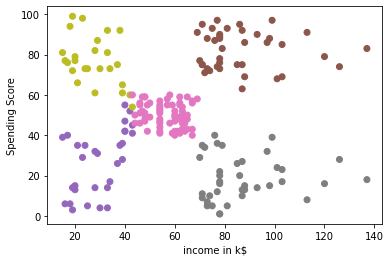

array(['tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive'],
      dtype='<U10')

In [12]:
#import numpy as np
import numpy as np
import matplotlib.pyplot as plt
color_map = np.array(['tab:purple','tab:brown','tab:pink','tab:gray','tab:olive'])
color_indx = color_map[k_means.labels_]

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=color_indx)
plt.xlabel("income in k$")
plt.ylabel("Spending Score")
plt.show()
map_color =list(zip(color_map,range(0,5)))

display(color_map)

In [19]:
#generate cluster index values for each row
cluster_assignments = k_means.predict(df)
cluster_assignments

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 0, 0, 0, 0, 4, 4, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [20]:
#evaluate the best value for k, number of clusters,,use calinski_harabasz_score
print(calinski_harabasz_score(df, cluster_assignments))

253.18324220965508
